In [1]:
import pandas as pd
import numpy as np

df=pd.read_excel("DadRegLis2.xlsx", sheet_name="exer13")
df.head()

,taxa_resp,cor,tamanho
0,28.0,azul,300.0
1,26.0,azul,381.0
2,31.0,azul,226.0
3,27.0,azul,350.0
4,35.0,azul,100.0


In [2]:
df.describe()

,taxa_resp,tamanho
count,15.000000,15.000000
mean,29.000000,280.000000
std,2.976095,98.755832
min,25.000000,100.000000
25%,27.000000,234.500000
50%,29.000000,296.000000
75%,31.000000,342.000000
max,35.000000,473.000000


In [3]:
df['cor'].unique()

array(['azul', 'verde', 'laranja'], dtype=object)

In [4]:
df_encoded = pd.get_dummies(df, columns=['cor'], prefix='cor')

In [5]:
df_encoded.head()

,taxa_resp,tamanho,cor_azul,cor_laranja,cor_verde
0,28.0,300.0,True,False,False
1,26.0,381.0,True,False,False
2,31.0,226.0,True,False,False
3,27.0,350.0,True,False,False
4,35.0,100.0,True,False,False


In [6]:
df_encoded['tamanho_cor_azul']=df_encoded['cor_azul']*df_encoded['tamanho']

In [7]:
df_encoded['tamanho_cor_laranja']=df_encoded['cor_laranja']*df_encoded['tamanho']

In [8]:
df_encoded['tamanho_cor_verde']=df_encoded['cor_verde']*df_encoded['tamanho']

In [9]:
df_encoded.head()

,taxa_resp,tamanho,cor_azul,cor_laranja,cor_verde,tamanho_cor_azul,tamanho_cor_laranja,tamanho_cor_verde
0,28.0,300.0,True,False,False,300.0,0.0,0.0
1,26.0,381.0,True,False,False,381.0,0.0,0.0
2,31.0,226.0,True,False,False,226.0,0.0,0.0
3,27.0,350.0,True,False,False,350.0,0.0,0.0
4,35.0,100.0,True,False,False,100.0,0.0,0.0


## a)

Formula:

$y_i=\beta_0+\beta_1 \mathbf{1}_{w=azul}(w) x_i + \beta_2 \mathbf{1}_{w=laranja}(w) x_i + \beta_3 \mathbf{1}_{w=verde}(w) x_i + \epsilon_i $

where $x$ is the size and $w$ is the colour



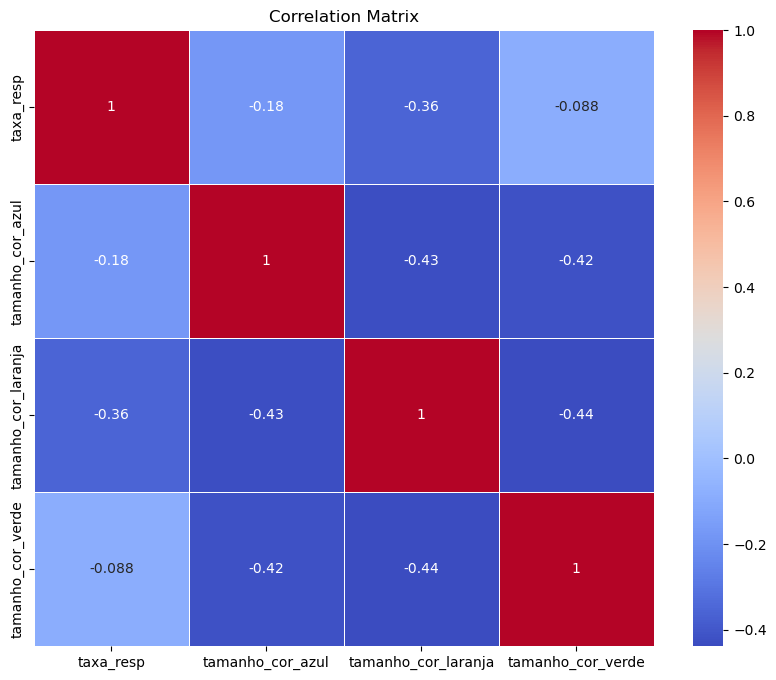

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_model =df_encoded[['taxa_resp','tamanho_cor_azul','tamanho_cor_laranja', 'tamanho_cor_verde']]
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
import statsmodels.api as sm

y = df_model['taxa_resp']  
X = df_model.drop(columns=['taxa_resp'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              taxa_resp   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           4.78e-09
Time:                        15:52:08   Log-Likelihood:                -9.5999
No. Observations:                  15   AIC:                             27.20
Df Residuals:                      11   BIC:                             30.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  37.5466    

c:\Users\hugog\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## b)

Given the p_value for the F-test, we can confidently affirm that the effect of the size on the average response rate does vary according to the paper colour

## c)

In [12]:
df_encoded = pd.get_dummies(df, columns=['cor'], prefix='cor')
df_encoded=df_encoded.astype(float)

In [13]:
y = df_encoded['taxa_resp']  
X = df_encoded.drop(columns=['taxa_resp','cor_azul'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              taxa_resp   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     341.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           3.90e-11
Time:                        15:52:08   Log-Likelihood:                -3.0342
No. Observations:                  15   AIC:                             14.07
Df Residuals:                      11   BIC:                             16.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.4912      0.303    123.606      

c:\Users\hugog\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## d)

Yes, there are evidences that the average response rate varies as a function of the parking size and of the colours

## f)

Given the relative similar coefficients of tamanho_cor for all colours, I would prefer the model of c). Also the c) model has a considerably lower AIC and BIC and higher adjusted $R^2$ showing the preference for this model

## g)

In [14]:
y = df_encoded['taxa_resp']  
X = df_encoded.drop(columns=['taxa_resp','cor_laranja'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              taxa_resp   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     341.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           3.90e-11
Time:                        15:52:09   Log-Likelihood:                -3.0342
No. Observations:                  15   AIC:                             14.07
Df Residuals:                      11   BIC:                             16.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7156      0.293    121.913      0.0

c:\Users\hugog\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Given the estimated coefficient and t-test result, we can confidently reject the hypothesis that the average response rate is the same for the orange and green colour. In fact, we can expect on average an increase of 3.1205 points in the average response rate when changing the colour from orange to green.

## h)

In [15]:
X.head()

,const,tamanho,cor_azul,cor_verde
0,1.0,300.0,1.0,0.0
1,1.0,381.0,1.0,0.0
2,1.0,226.0,1.0,0.0
3,1.0,350.0,1.0,0.0
4,1.0,100.0,1.0,0.0


In [16]:
from scipy.stats import norm, t

x0 = np.array([1, 300, 0, 0])  

# Predict the mean response at x0
y0_hat = model.predict(x0)

# Degrees of freedom for the residuals
df_residual = model.df_resid

# Estimate the variance of the residuals
s_squared = np.sum(model.resid ** 2) / df_residual
s = np.sqrt(s_squared)  # Standard error of the residuals

# Calculate (X'X)^(-1)
XtX_inv = np.linalg.inv(np.dot(X.T, X))

# Calculate the standard error of the mean prediction
se_mean_prediction = np.sqrt(np.dot(np.dot(x0.T, XtX_inv), x0))

# Calculate the critical t-value for the 95% confidence level
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df=df_residual)

# Confidence Interval for E(y0)
ci_lower_mean = y0_hat - t_critical * se_mean_prediction
ci_upper_mean = y0_hat + t_critical * se_mean_prediction

print(f"95% Confidence interval for E(y0): ({ci_lower_mean[0]:.4f}, {ci_upper_mean[0]:.4f})")

# Prediction Interval for a new observation y0
se_prediction = np.sqrt(se_mean_prediction**2 + s_squared)

pi_lower = y0_hat - t_critical * se_prediction
pi_upper = y0_hat + t_critical * se_prediction

print(f"95% Prediction interval for a new observation y0: ({pi_lower[0]:.4f}, {pi_upper[0]:.4f})")

95% Confidence interval for E(y0): (25.7556, 27.7878)
95% Prediction interval for a new observation y0: (25.5021, 28.0414)


## i)

Correlation matrix of estimated betas:
              const   tamanho  cor_azul  cor_verde
const      1.000000 -0.849216 -0.325869  -0.178646
tamanho   -0.849216  1.000000 -0.055281  -0.218674
cor_azul  -0.325869 -0.055281  1.000000   0.499241
cor_verde -0.178646 -0.218674  0.499241   1.000000


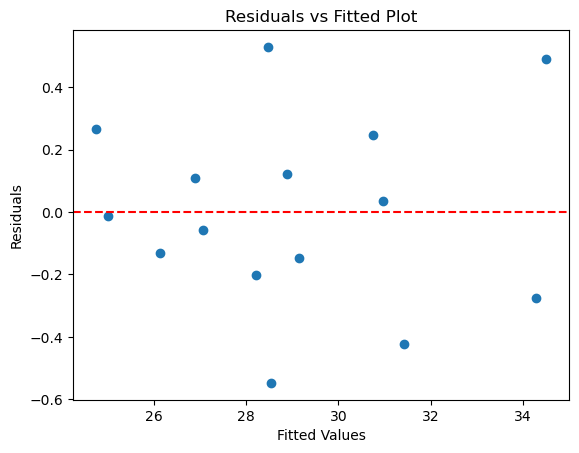

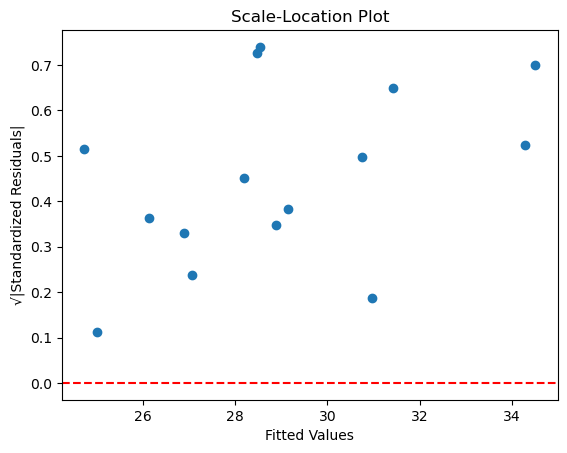

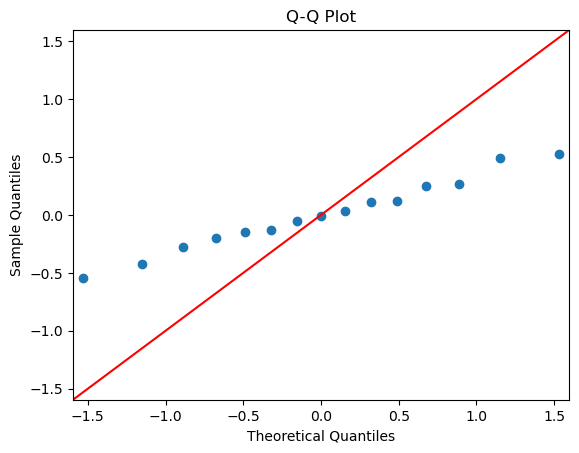

Shapiro-Wilk test statistic: 0.9818, p-value: 0.9801
Fail to reject the null hypothesis: Residuals appear to be normally distributed.
Anderson-Darling test statistic: 0.1245
Critical values and significance levels:
Significance level: 15.0%, Critical value: 0.498
Fail to reject the null hypothesis at the 15.0% significance level.
Significance level: 10.0%, Critical value: 0.568
Fail to reject the null hypothesis at the 10.0% significance level.
Significance level: 5.0%, Critical value: 0.681
Fail to reject the null hypothesis at the 5.0% significance level.
Significance level: 2.5%, Critical value: 0.794
Fail to reject the null hypothesis at the 2.5% significance level.
Significance level: 1.0%, Critical value: 0.945
Fail to reject the null hypothesis at the 1.0% significance level.
Jarque-Bera test statistic: 0.2541, p-value: 0.8807
Fail to reject the null hypothesis: Residuals appear to be normally distributed.


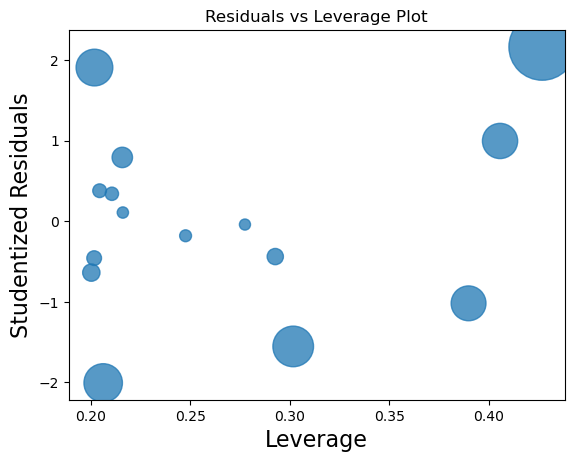

     Feature        VIF
0      const  10.759155
1    tamanho   1.054504
2   cor_azul   1.337420
3  cor_verde   1.400293


c:\Users\hugog\Desktop\Mestrado - Matérias\Regression Models\Linear_Regression_Diagnostics.py:75: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


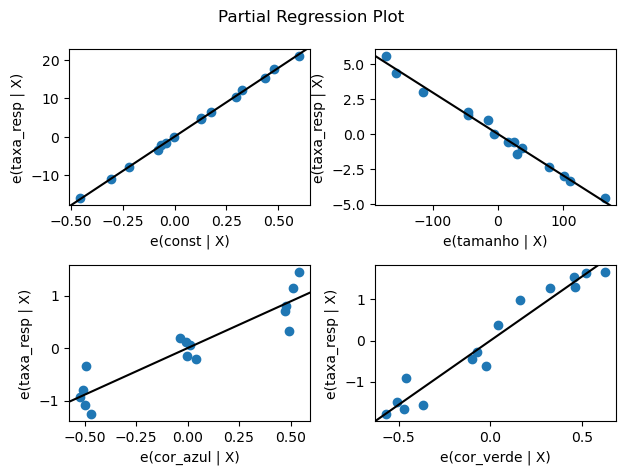

Breusch-Pagan test p-value: 0.2243
Result: Fail to reject the null hypothesis. There is no evidence of heteroscedasticity in the residuals.
White test p-value: 0.3864
Result: Fail to reject the null hypothesis. There is no evidence of heteroscedasticity in the residuals.


In [17]:
from Linear_Regression_Diagnostics import model_diagnostics

model_diagnostics(model, X, y)